In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Plotly for interactive plots
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Statistical functions
from scipy.stats import pearsonr, trim_mean, spearmanr, chi2_contingency

# Sklearn metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [4]:
patient_data = pd.read_csv('PatientData.csv')
patient_data.head()

,Patient_Status,T,RR
0,HEALTHY,35.821266,19.142584
1,HEALTHY,36.353128,20.759505
2,SICK,37.352552,22.507282
3,HEALTHY,38.645271,20.855217
4,SICK,38.987791,20.886224




---



### **a)** Plot histogram of T (temperature) for both SICK and HEALTHY patients on the same axis. Does temperature appear to be **strongly correlated** with PatientStatus (SICK vs.HEALTHY)?

**Answer for a)**

So since the histogram of sick and health have high overlaping area, temperature doesn't **strongly** correlate with Patient_Status but a **moderate**.Though the SICK patients tend to have slightly higher temperatures overall. While there is some variation in temperature between the two groups, it does not appear to be strongly correlated with patient status. Both SICK and HEALTHY patients exhibit a wide range of temperatures, which suggests that temperature alone may not be a strong predictor of whether a patient is sick or healthy.


I have also performed additional quantative test to check if my assumption are correct using pearson correlation.

Pearson Correlation: 0.442267537907381, p-value: 5.5025170014598154e-11

*  A value of 0.44 suggests a moderate positive correlation between temperature and status of being sick or healthy. This means that, as temperature increases, the likelihood of a patient being classified as "SICK" also increases. However, the correlation is not very strong—there is still a significant amount of variability in patient status that is not explained by temperature alone.

*  The p-value is extremely small. There is a very low probability that this correlation is due to random chance. Therefore, we can be confident that temperature is related to patient status, even though the **strength** of the relationship is **moderate**.

In [5]:

data = patient_data.copy()

data['Status_Binary'] = data['Patient_Status'].apply(lambda x: 1 if x == 'SICK' else 0)

# Calculate Pearson correlation
correlation, p_value = pearsonr(data['Status_Binary'], data['T'])

print(f"Pearson Correlation: {correlation}, p-value: {p_value}")

Pearson Correlation: 0.442267537907381, p-value: 5.5025170014598154e-11


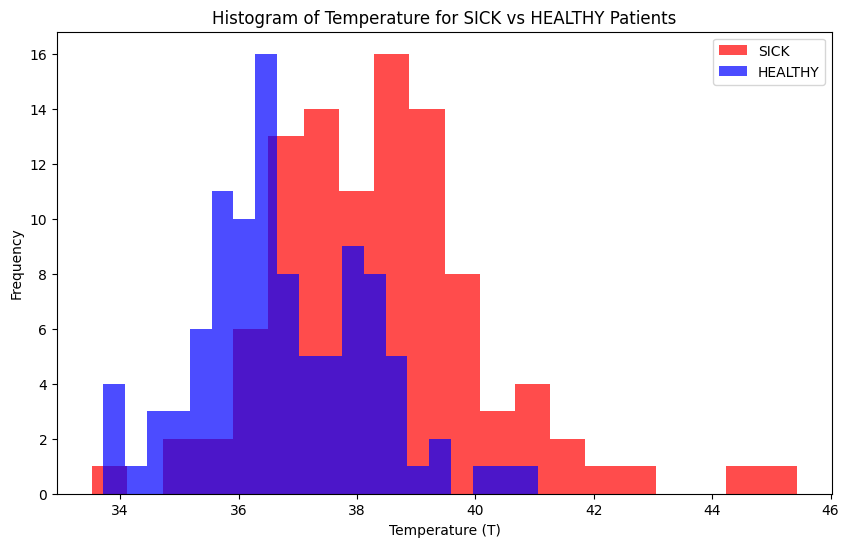

In [6]:

# Separate the data based on Patient_Status
sick_patients = data[data['Patient_Status'] == 'SICK']
healthy_patients = data[data['Patient_Status'] == 'HEALTHY']

# Plot the histograms
plt.figure(figsize=(10, 6))
plt.hist(sick_patients['T'], bins=20, alpha=0.7, label='SICK', color='red')
plt.hist(healthy_patients['T'], bins=20, alpha=0.7, label='HEALTHY', color='blue')
plt.xlabel('Temperature (T)')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature for SICK vs HEALTHY Patients')
plt.legend()
plt.show()

### **b)** Now create an ordinal variable called T_ORD that maps T data as follows:
$$
T \leq 37 \implies T_{ord} = Normal
$$
$$
37 < T \leqq 38.5 \implies T_{ord} = Fever
$$
$$
T > 38.5 \implies T_{ord} = Danger
$$

In [7]:
patient_data['T_ORD'] = pd.cut(patient_data['T'], bins=[-float('inf'), 37, 38.5, float('inf')], labels=['Normal', 'Fever', 'Danger'])

### Plot a histogram of T_ORD showing SICK and HEALTHY patients separately on the same axis. The x-axis categories should be ordered as NORMAL, FEVER, DANGER.

In [8]:
patient_data['T_ORD'] = pd.Categorical(patient_data['T_ORD'], categories=['Normal', 'Fever', 'Danger'], ordered=True)

hist_T_ORD = px.histogram(patient_data, x='T_ORD', color='Patient_Status', barmode='overlay',
                          category_orders={'T_ORD': ['Normal', 'Fever', 'Danger']},
                          labels={'T_ORD': 'Temperature Category'},
                          title="Histogram of T_ORD (Temperature Category) for SICK vs HEALTHY Patients")
hist_T_ORD.show()

### **c)** Create (and report) a contingency table for T_ORD vs. PatientStatus and use a x^2 test to check if T_ORD is significantly associated with PatientStatus. Report your null hypothesis H0 (15 words), your alternate hypothesis H1, your x^2 value, your degrees of freedom, your p-value, and your conclusion (75 words).

**Answer for c)**

*   *Null Hypothesis (H0):*

T_ORD and Patient_Status are independent.

*  *Alternate Hypothesis (H1):*

T_ORD and Patient_Status are not independent, meaning there is a significant association between them.

In [9]:

# Create a contingency table for T_ORD vs Patient_Status
contingency_table = pd.crosstab(patient_data ['T_ORD'], patient_data['Patient_Status'])

# Perform the Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

In [10]:
print("Contingency Table:")
print(contingency_table)
print("\nChi-square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)

Contingency Table:
Patient_Status  HEALTHY  SICK
T_ORD                        
Normal               61    20
Fever                28    35
Danger               11    45

Chi-square Statistic: 42.173721340388006
Degrees of Freedom: 2
P-value: 6.951727985959681e-10


**Answer for c)**

**Conclusion:** Since the p-value is way smaller than the common threshold of 0.05, we can reject the null hypothesis.

There is a significant association between T_ORD and Patient_Status. (T_ORD) is strongly associated with whether they are healthy or sick.

### **d)** Provide box plots for RR for each of the three T_ORD values pooling SICK and HEALTHY patients together. Based on the box plots, what can you infer about about the relationship between T_ORD and RR?

In [11]:

# Create a box plot using Plotly
fig = px.box(patient_data, x='T_ORD', y='RR', title='Box Plot of RR for Each T_ORD Category',
             labels={'T_ORD': 'T_ORD (Temperature Categories)', 'RR': 'Respiratory Rate (RR)'}, points="all")

# Show the plot
fig.show()

It can be observed that the median respiratory rate increases with higher temperature categories. It means that there is a relationship between increased temperature (fever or danger levels) and respiratory rate.

More analysis on the plots:

First the overlap can be observed in all three categories.

*   **Normal:** It has a narrow IQR, meaning most of the normal people ( 50% of the data) have the RR between [19.5 - 21]. From the upper whisker (75th percentiles)  we can see that there are some cases with normal people haveing higher RR than 50% of the norm. We can also see some **outliers** in there.

*  **Fever:** So the IQR is wider here meaning 50% of the people with Fever label on them have RR between [20 - 22]. The upper and lower whiskers almost covered the whole RR range.

*   **Danger:** 50% of the people have  [20.7 - 22.5] RR.

Although the RR increase as the Tempreture increase, but these three categories have a significant overlapping RR.

### **e)** Compute the inter-quartile range and the “20% trimmed mean” of RR for both HEALTHY and SICK patients. (20% means dropping the top and bottom 10% of samples)

I have also plotted the probability distribution of Sick-labeled Respiratory Rate and healthy-labeled. The high variaty between Sick RR is highly noticable and can show that it is drawn from multinomial distribution.

In [12]:
def calculate_trimmed_mean_20(data): #(trimming 10% from both ends)
    return trim_mean(data, proportiontocut=0.1)


RR_sick = patient_data[patient_data['Patient_Status'] == 'SICK']['RR']
RR_healthy = patient_data[patient_data['Patient_Status'] == 'HEALTHY']['RR']

iqr_healthy = RR_healthy.quantile(0.75) - RR_healthy.quantile(0.25)
iqr_sick = RR_sick.quantile(0.75) - RR_sick.quantile(0.25)

print("IQR Healthy:", iqr_healthy)
print("IQR Sick:", iqr_sick)


trimmed_mean_healthy = calculate_trimmed_mean_20(RR_healthy)
trimmed_mean_sick = calculate_trimmed_mean_20(RR_sick)

print("20% Trimmed Mean Healthy:", trimmed_mean_healthy)
print("20% Trimmed Mean Sick:", trimmed_mean_sick)


IQR Healthy: 0.7953133422502212
IQR Sick: 1.6551857952876503
20% Trimmed Mean Healthy: 20.030955486181114
20% Trimmed Mean Sick: 21.975704253840554


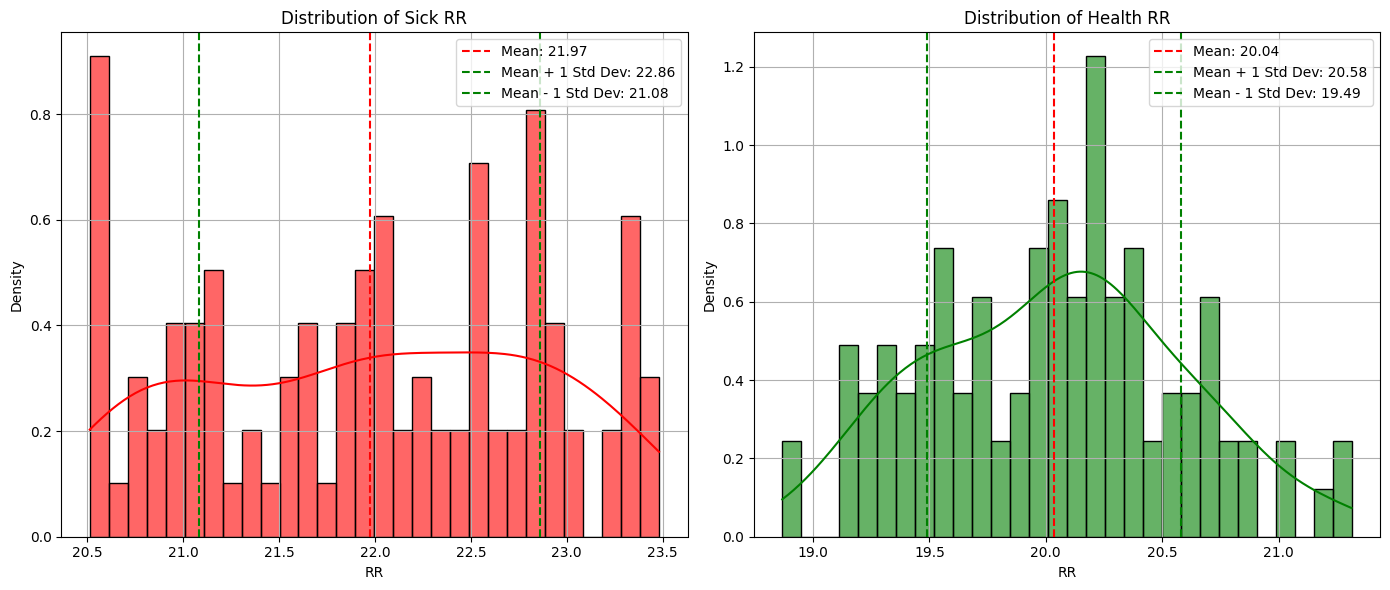

In [13]:
df1 = RR_sick.copy()
df2 = RR_healthy.copy()

mean1 = df1.mean()
variance1 = df1.var()

mean2 = df2.mean()
variance2 = df2.var()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df1, bins=30, kde=True, stat='density', color='red', alpha=0.6, ax=axes[0])
axes[0].axvline(mean1, color='red', linestyle='--', label=f'Mean: {mean1:.2f}')
axes[0].axvline(mean1 + np.sqrt(variance1), color='green', linestyle='--', label=f'Mean + 1 Std Dev: {mean1 + np.sqrt(variance1):.2f}')
axes[0].axvline(mean1 - np.sqrt(variance1), color='green', linestyle='--', label=f'Mean - 1 Std Dev: {mean1 - np.sqrt(variance1):.2f}')
axes[0].set_title('Distribution of Sick RR')
axes[0].set_xlabel('RR')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid()

sns.histplot(df2, bins=30, kde=True, stat='density', color='green', alpha=0.6, ax=axes[1])
axes[1].axvline(mean2, color='red', linestyle='--', label=f'Mean: {mean2:.2f}')
axes[1].axvline(mean2 + np.sqrt(variance2), color='green', linestyle='--', label=f'Mean + 1 Std Dev: {mean2 + np.sqrt(variance2):.2f}')
axes[1].axvline(mean2 - np.sqrt(variance2), color='green', linestyle='--', label=f'Mean - 1 Std Dev: {mean2 - np.sqrt(variance2):.2f}')
axes[1].set_title('Distribution of Health RR')
axes[1].set_xlabel('RR')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

f) Using bootstrapping, compute the 90% confidence interval of the “20% trimmed mean” of
RR for HEALTHY patients. Follow Procedure 5.6 from Cohen’s text:
1. Construct a distribution from K bootstrap samples for a statistic u; *
2. Sort the values in the distribution
3. The lower bound of the 90% confidence interval is the (K*0.05)th value, the upper
bound is the (K*0.95)th value in the sorted distribution.
(Here, u is the observed trimmed mean and a bootstrap sample will consist of 200 samples drawn with replacement from RR.)

i)  Report your value of K, and your 90% confidence interval

ii) Does your estimate from part e) fall within the interval computed in part f)?

iii) If you wanted this to fail (i.e., you want to come up with an interval that only occasionally contains the true value), what would you change?

In [14]:

def bootstrap_conf_interval(data, num_boots_samples, resampling_size, actual_trimmed_mean , conf_l_l, conf_l_u):
  # Set the number of bootstrap samples (K)
  K = num_boots_samples

  # Generate K bootstrap samples and calculate the trimmed mean for each sample
  bootstrap_means = []

  for _ in range(K):
      bootstrap_sample = np.random.choice(data, size=resampling_size, replace=True)  # Draw with replacement
      trimmed_mean = calculate_trimmed_mean_20(bootstrap_sample)
      bootstrap_means.append(trimmed_mean)

  # Sort the bootstrap means
  bootstrap_means_sorted = sorted(bootstrap_means)

  # Calculate the 90% confidence interval
  lower_bound = np.percentile(bootstrap_means_sorted, conf_l_l)
  upper_bound = np.percentile(bootstrap_means_sorted, conf_l_u)

  # Display the confidence interval
  print(lower_bound, upper_bound)

  # Plot the bootstrap distribution
  plt.figure(figsize=(10, 6))
  plt.hist(bootstrap_means, bins=30, color='skyblue', alpha=0.7, edgecolor='black')

  # Add vertical lines for the trimmed mean from part (e) and the confidence interval
  plt.axvline(x=actual_trimmed_mean, color='yellow', linestyle='--', label=f'Trimmed Mean (part e): {trimmed_mean_healthy:.2f}')
  plt.axvline(x=lower_bound, color='green', linestyle='--', label=f'90% CI Lower Bound: {lower_bound:.2f}')
  plt.axvline(x=upper_bound, color='green', linestyle='--', label=f'90% CI Upper Bound: {upper_bound:.2f}')

  # Add labels and title
  plt.title('Bootstrap Distribution of 20% Trimmed Mean of RR for HEALTHY Patients')
  plt.xlabel('20% Trimmed Mean of RR')
  plt.ylabel('Frequency')
  plt.legend()

  # Show the plot
  plt.show()

19.92809555390163 20.125683904724497


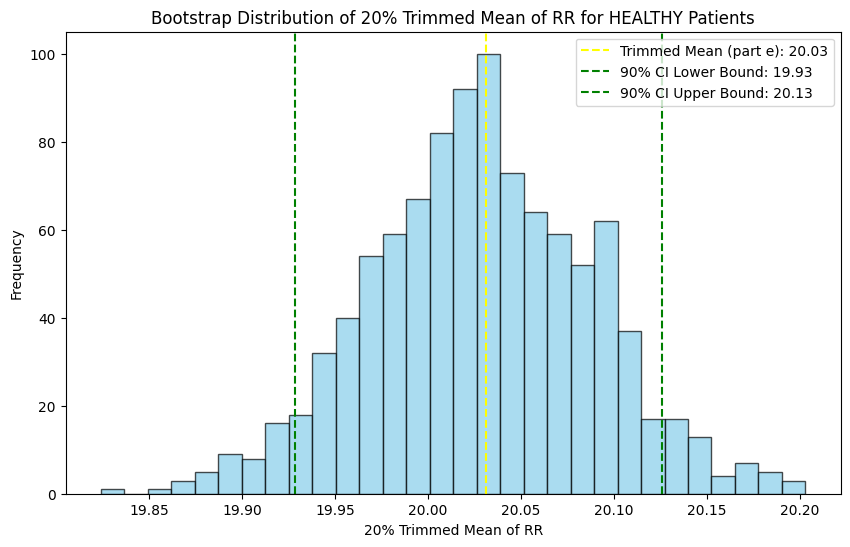

In [15]:
bootstrap_conf_interval(RR_healthy, num_boots_samples=1000, resampling_size=100, actual_trimmed_mean = trimmed_mean_healthy, conf_l_l = 5, conf_l_u=95)

19.96273760237387 20.09604428292734


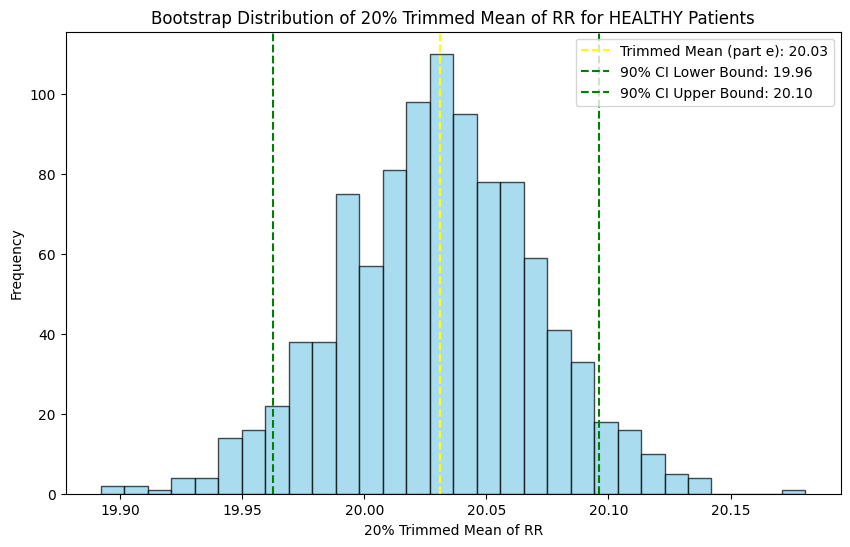

In [16]:
bootstrap_conf_interval(RR_healthy, num_boots_samples=1000, resampling_size=200, actual_trimmed_mean = trimmed_mean_healthy, conf_l_l = 5, conf_l_u=95)

The 90% confidence interval for the 20% trimmed mean of RR for HEALTHY patients, based on **1000** bootstrap samples, is:

1. **Lower bound:** 19.96
2. **Upper bound:** 20.10

Now, addressing the remaining parts:

ii) The trimmed mean calculated in part (e) was **20.03**, and it falls within this confidence interval. See the plot.

iii) If you wanted to create a confidence interval that only occasionally contains the true value (making it less reliable), you could:

1. We can reduce the confidence level, which would result in a narrower interval, increasing the chance that it excludes the true value.

2. We can also use fewer bootstrap samples (reduce K), which would increase variability in the results and make the confidence interval less precise.

3. We can redunce resampling size, and force the samples to have less representative of the population.

4. Increasing the Trimming Proportion

(Let's try this)

19.67066739839183 20.034753337169747


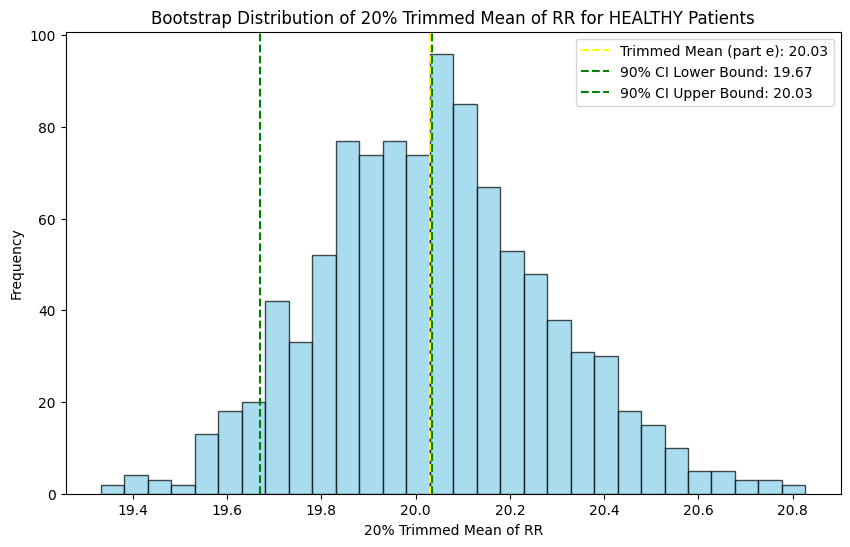

In [17]:
bootstrap_conf_interval(RR_healthy, num_boots_samples=1000, resampling_size=5, actual_trimmed_mean = trimmed_mean_healthy, conf_l_l = 5, conf_l_u=50)

I applied each solution one by one and this is the setting I could fail the test:



1.   K = 5 -> from 1000
2.   Resampling size = 100 -> 1/2 before
2.   Reducing the confidence level  (from 90% to ~50%)



### **g)** Examine the RR feature for all patients with T < 38.6 degrees. Do the feature data contain outliers? Describe how you tested this and what conclusions you drew. How did the mean and median of RR change with the outliers (if any) removed? (50 words + calculations)

In [18]:
patient_data_less_38 = patient_data[patient_data['T'] < 38.6]
patient_data_less_38['T_ORD'] = pd.Categorical(patient_data_less_38['T_ORD'], categories=['Normal', 'Fever', 'Danger'], ordered=True)

hist_T_ORD = px.histogram(patient_data_less_38, x='T_ORD', color='Patient_Status', barmode='overlay',
                          category_orders={'T_ORD': ['Normal', 'Fever', 'Danger']},
                          labels={'T_ORD': 'Temperature Category'},
                          title="Histogram of T_ORD (Temperature Category) for SICK vs HEALTHY Patients")
hist_T_ORD.show()

<ipython-input-18-286bab3ba745>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
fig = px.box(patient_data_less_38, x='T_ORD', y='RR', title='Box Plot of RR for Each T_ORD Category',
             labels={'T_ORD': 'T_ORD (Temperature Categories)', 'RR': 'Respiratory Rate (RR)'}, points="all")

# Show the plot
fig.show()

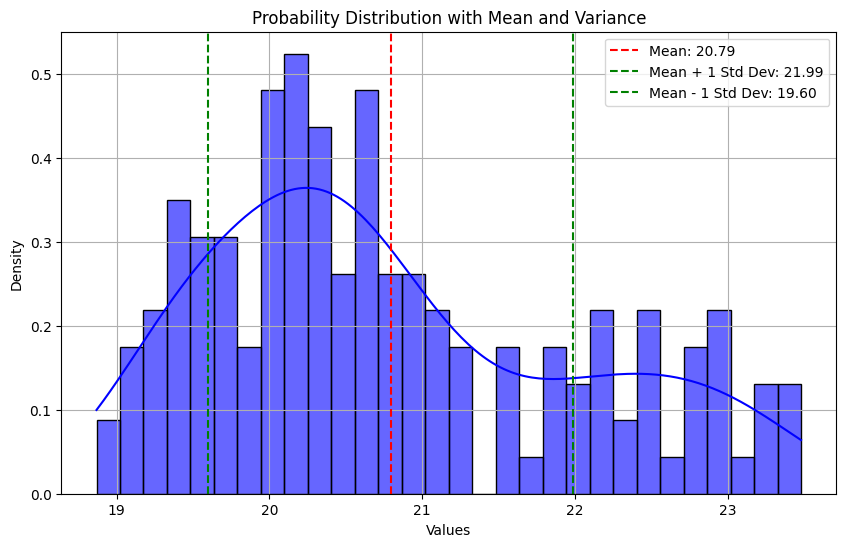

In [21]:
df = patient_data_less_38.copy()

mean = df['RR'].mean()
variance = df['RR'].var()

plt.figure(figsize=(10, 6))
sns.histplot(df['RR'], bins=30, kde=True, stat='density', color='blue', alpha=0.6)

# Adding mean and variance lines
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(mean + np.sqrt(variance), color='green', linestyle='--', label=f'Mean + 1 Std Dev: {mean + np.sqrt(variance):.2f}')
plt.axvline(mean - np.sqrt(variance), color='green', linestyle='--', label=f'Mean - 1 Std Dev: {mean - np.sqrt(variance):.2f}')

# Adding labels and title
plt.title('Probability Distribution with Mean and Variance')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [22]:
filtered_data = patient_data_less_38.copy()

outliers_by_category = {}
non_outliers_data = filtered_data.copy()

for category in filtered_data['T_ORD'].unique():
    category_data = filtered_data[filtered_data['T_ORD'] == category]['RR']

    q1 = category_data.quantile(0.25)
    q3 = category_data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = category_data[(category_data < lower_bound) | (category_data > upper_bound)]
    outliers_by_category[category] = outliers

    non_outliers_data = non_outliers_data[~(non_outliers_data['RR'].isin(outliers))]

mean_before = filtered_data['RR'].mean()
median_before = filtered_data['RR'].median()

mean_after = non_outliers_data['RR'].mean()
median_after = non_outliers_data['RR'].median()

print(f"Mean RR before removing outliers: {mean_before}")
print(f"Median RR before removing outliers: {median_before}")
print(f"Mean RR after removing outliers: {mean_after}")
print(f"Median RR after removing outliers: {median_after}")

# Display outliers by category
for category, outliers in outliers_by_category.items():
    print(f"Outliers in {category} category:")
    print(outliers)

Mean RR before removing outliers: 20.794120522133536
Median RR before removing outliers: 20.53982386054529
Mean RR after removing outliers: 20.66885189781746
Median RR after removing outliers: 20.44597370699531
Outliers in Normal category:
21     23.007225
53     23.307529
82     23.364805
125    23.295096
133    22.922676
138    22.870931
169    22.780123
198    22.858162
Name: RR, dtype: float64
Outliers in Fever category:
Series([], Name: RR, dtype: float64)
Outliers in Danger category:
39    20.278145
Name: RR, dtype: float64


To examine the RR feature for patients with T < 38.6 and detect outliers, I applied the IQR method for each temperature category (T_ORD). Outliers were defined as values falling outside 1.5 times the interquartile range (IQR). After removing outliers, I compared the mean and median RR before and after the removal.

**IQR Method:**

I calculated the 25th and 75th percentiles (Q1 and Q3) and identified any values beyond the bounds
[𝑄1 − 1.5 × 𝐼𝑄𝑅 , 𝑄3 + 1.5 × 𝐼𝑄𝑅]

**Outliers Found:**

The "Normal" category showed several outliers.

**Results:**

*  Before outlier removal: Mean = 20.79, Median = 20.54.
*  After outlier removal: The mean and median did not change significantly.

Outliers in the "Normal" group had little impact on the overall distribution, indicating the dataset is fairly robust to their influence.

In [23]:
non_o_norm = non_outliers_data[non_outliers_data['T_ORD'] == 'Normal']

In [24]:
non_o_fever = non_outliers_data[non_outliers_data['T_ORD'] == 'Fever']

In [26]:
non_o_danger = non_outliers_data[non_outliers_data['T_ORD'] == 'Danger']
non_o_danger

,Patient_Status,T,RR,T_ORD
38,SICK,38.553642,21.662206,Danger
89,SICK,38.593262,21.508714,Danger
107,SICK,38.509178,22.189099,Danger
117,SICK,38.578561,22.057026,Danger


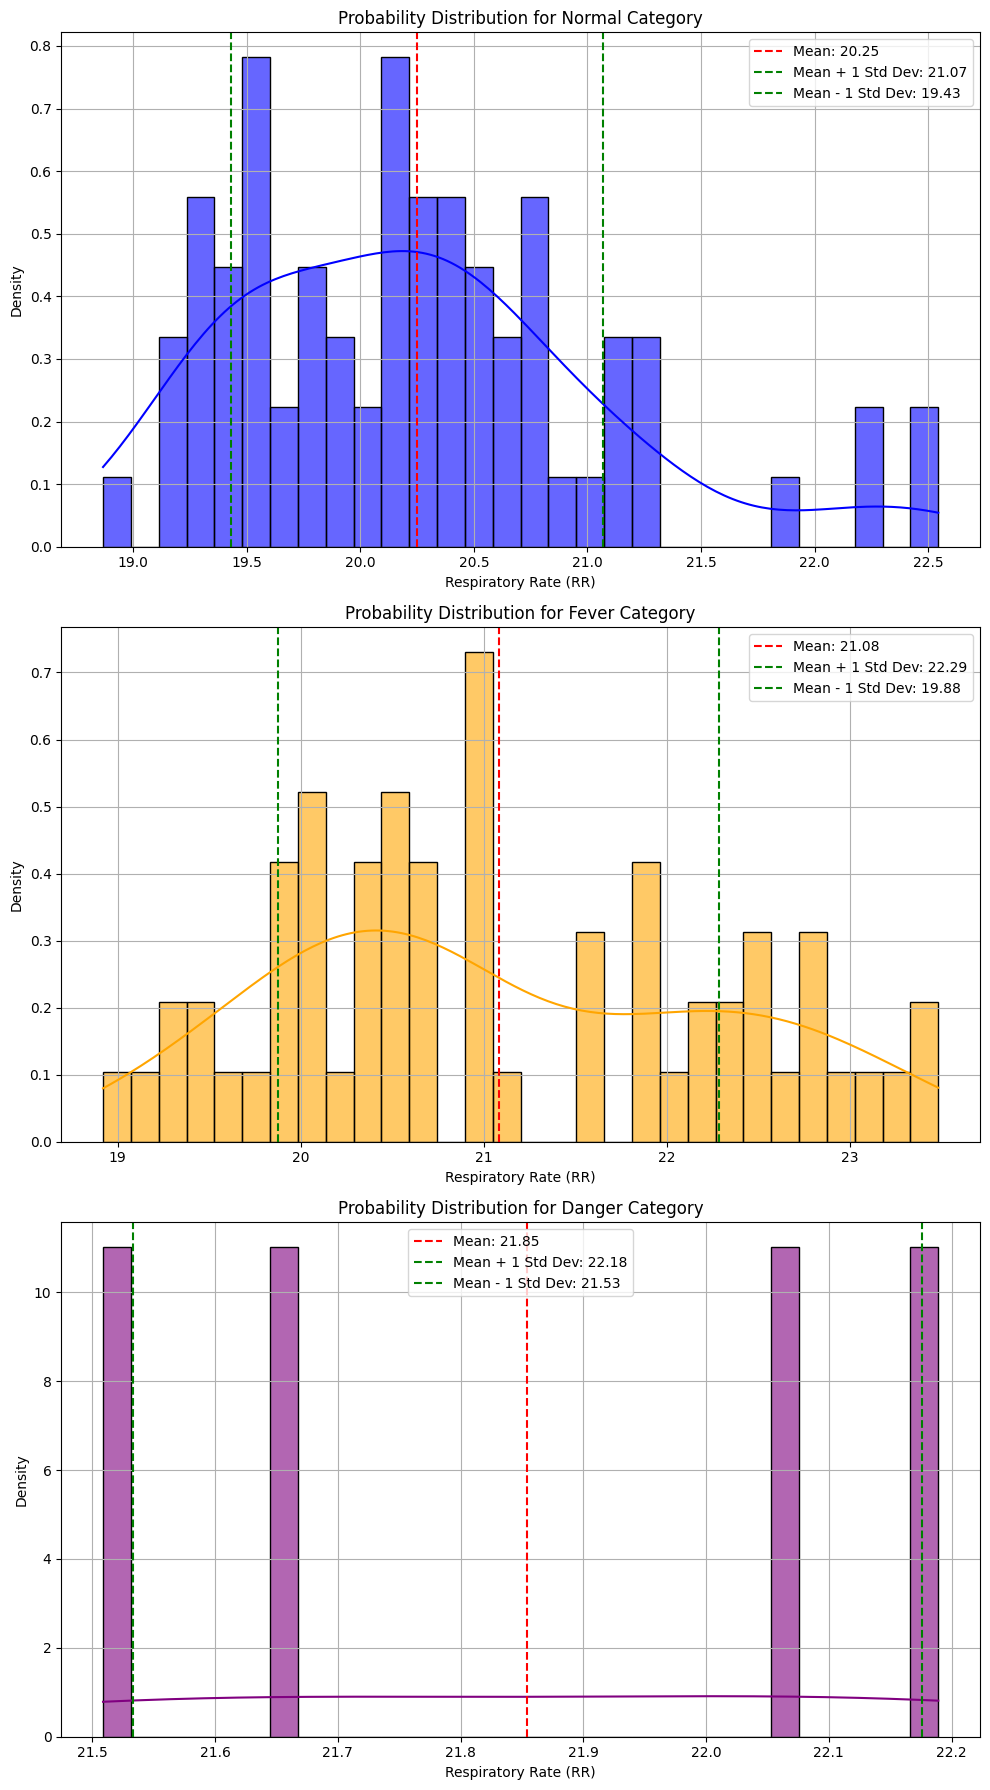

In [39]:
# Initialize a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Function to create histogram plot with mean and variance
def plot_distribution(ax, data, title, color):
    mean = data['RR'].mean()
    variance = data['RR'].var()

    sns.histplot(data['RR'], bins=30, kde=True, stat='density', color=color, alpha=0.6, ax=ax)

    # Adding mean and variance lines
    ax.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    ax.axvline(mean + np.sqrt(variance), color='green', linestyle='--', label=f'Mean + 1 Std Dev: {mean + np.sqrt(variance):.2f}')
    ax.axvline(mean - np.sqrt(variance), color='green', linestyle='--', label=f'Mean - 1 Std Dev: {mean - np.sqrt(variance):.2f}')

    # Adding labels and title
    ax.set_title(title)
    ax.set_xlabel('Respiratory Rate (RR)')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid()

# Plot for Normal category
plot_distribution(axes[0], non_o_norm, 'Probability Distribution for Normal Category', 'blue')

# Plot for Fever category
plot_distribution(axes[1], non_o_fever, 'Probability Distribution for Fever Category', 'orange')

# Plot for Danger category
plot_distribution(axes[2], non_o_danger, 'Probability Distribution for Danger Category', 'purple')
plt.savefig('s.png')
# Adjust layout and show the plot
plt.tight_layout()
plt.show()


I created these figures to illustrate how indistinct the data is across the three categories, specially for the Danger category.

### **h)** What is the Spearman Rank Correlation between T and RR for HEALTHY patients? Using randomization (or permutation), test whether these two variables are significantly correlated. Briefly describe how you did this. What is H0? What is H1? Did you complete a 1- or 2-tailed test and why? What p-value did you obtain? What conclusion do you draw? (50 words)

*   *Null Hypothesis (H0):*

Temperature of Healthy samples and their Respiratory Rate are independent.

*  *Alternate Hypothesis (H1):*

Temperature of Healthy samples and their Respiratory Rate are **not** independent, meaning there is a significant association between them.

Let's apply the permutation (Randomly shuffle ranks of y, re-compute
ρ), which in this case, enforce the null hypothesis.


**Conclusion:**

This was a two-tailed test because we were interested in whether there was any significant correlation, positive or negative. The p-value is very high (0.982), so we fail to reject H0. There is no significant correlation between T and RR for healthy patients.

Furthuremore, 95% of the data is less than -|p| and greater than |p|. Therefore, we can reject the null hypothesis at 3% confidence level.

In [41]:
t_healthy = patient_data[patient_data.Patient_Status=="HEALTHY"]['T']
rr_healthy = patient_data[patient_data.Patient_Status=="HEALTHY"]['RR']

spearman_cor, spearman_p_val = spearmanr(t_healthy, rr_healthy)
print(f"Spearmans Cor: {spearman_cor}\np_value: {spearman_p_val}")

Spearmans Cor: 0.0026522652265226526
p_value: 0.9791063989856768


In [ ]:
def randomization_test_fixed(x, y, num_permutations=1000):
    observed_corr = spearmanr(x, y)[0]
    extreme_count = 0

    y_values = y.values  # Convert to NumPy array

    for _ in range(num_permutations):
        np.random.shuffle(y_values)  # Shuffle y
        permuted_corr = spearmanr(x, y_values)[0]
        if abs(permuted_corr) >= abs(observed_corr):
            extreme_count += 1

    p_value = extreme_count / num_permutations
    return p_value, observed_corr


# Filter the data for healthy patients
healthy_data = data[data['Patient_Status'] == 'HEALTHY']
# Run the randomization test again with the fixed function
p_value_fixed, observed_spearman_corr_fixed = randomization_test_fixed(healthy_data['T'], healthy_data['RR'])

observed_spearman_corr_fixed, p_value_fixed


(0.0026522652265226526, 0.98)

97.1%  are more extreme than ρ


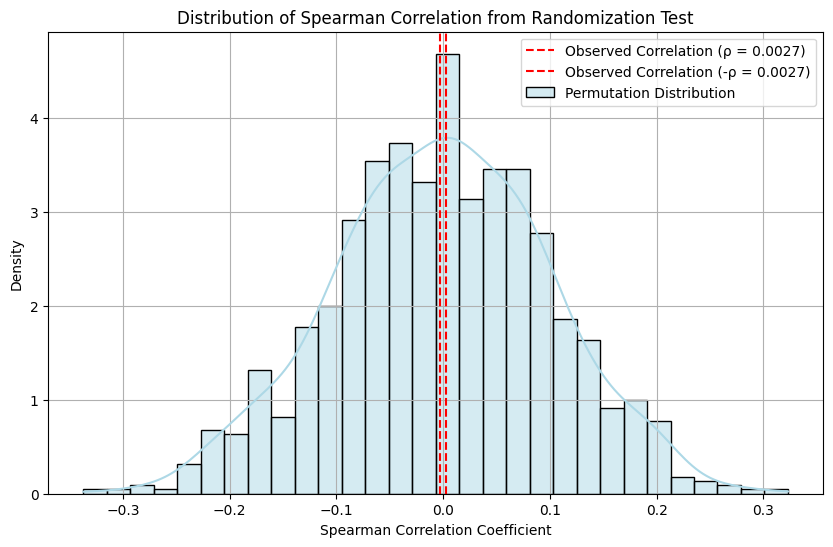

In [ ]:


# Prepare for plotting
num_permutations = 1000
extreme_values = []

# Running the randomization test again to collect the correlation values
for _ in range(num_permutations):
    y_values = healthy_data['RR'].values.copy()
    np.random.shuffle(y_values)  # Shuffle y
    permuted_corr = spearmanr(healthy_data['T'], y_values)[0]
    extreme_values.append(permuted_corr)

# Convert to a NumPy array for easier handling
extreme_values = np.array(extreme_values)


# Count how many times a value as extreme as the observed correlation was observed
extreme_count_gt = np.sum(extreme_values > abs(observed_spearman_corr_fixed))
extreme_count_lt = np.sum(extreme_values < -(observed_spearman_corr_fixed))


print(f"{(extreme_count_gt+extreme_count_lt)*100/(len(extreme_values))}%  are more extreme than ρ")

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(extreme_values, bins=30, kde=True, color='lightblue', stat='density', label='Permutation Distribution')
plt.axvline(-(observed_spearman_corr_fixed), color='red', linestyle='--', label='Observed Correlation (ρ = {:.4f})'.format(observed_spearman_corr_fixed))
plt.axvline(abs(observed_spearman_corr_fixed), color='red', linestyle='--', label='Observed Correlation (-ρ = {:.4f})'.format(observed_spearman_corr_fixed))

# Adding labels and legend
plt.title('Distribution of Spearman Correlation from Randomization Test')
plt.xlabel('Spearman Correlation Coefficient')
plt.ylabel('Density')
plt.legend()
plt.grid()

# Show plot
plt.show()

two-tailed test because we are interested in whether the correlation is significantly different from zero in either direction.

Q2

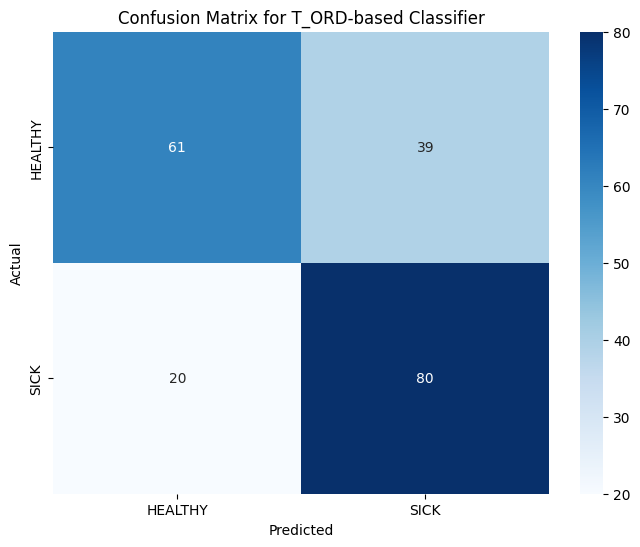

In [ ]:

# Create a classifier based on the threshold T_ORD == 'Normal'
patient_data['Predicted_Status_T_ORD'] = patient_data['T_ORD'].apply(lambda x: 'HEALTHY' if x == 'Normal' else 'SICK')

# Generate the confusion matrix
conf_matrix = confusion_matrix(patient_data['Patient_Status'], patient_data['Predicted_Status_T_ORD'], labels=['HEALTHY', 'SICK'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['HEALTHY', 'SICK'], yticklabels=['HEALTHY', 'SICK'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for T_ORD-based Classifier')
plt.show()


The key idea here is how the thresholds are used to determine the classification:

**Distinct Threshold Values:**

In this case, T_ORD has three possible values:
"Normal," "Fever," and "Danger."

However, our classification rule does not treat all three values independently. we have grouped "Fever" and "Danger" as the same outcome ("SICK"), while "Normal" results in "HEALTHY." Therefore, there is effectively one distinct threshold:

"Normal" versus "Otherwise" (which includes "Fever" and "Danger").


**Vertices in the ROC Curve:**

In the context of an ROC curve, a vertex represents a specific threshold where the classifier performance is evaluated. To create a complete ROC curve, we also need to include the extreme cases:

*   *Classify everyone as "SICK":* This represents the threshold where no one is classified as "HEALTHY."
*   *Use T_ORD == "Normal" as the threshold.*
*   *Classify everyone as "HEALTHY":* This represents the threshold where no one is classified as "SICK."

Thus, when we discuss distinct thresholds, there is just one threshold to vary in the middle (T_ORD == "Normal"), but there are 3 vertices in the ROC curve because we also need to consider the extreme cases for completeness.

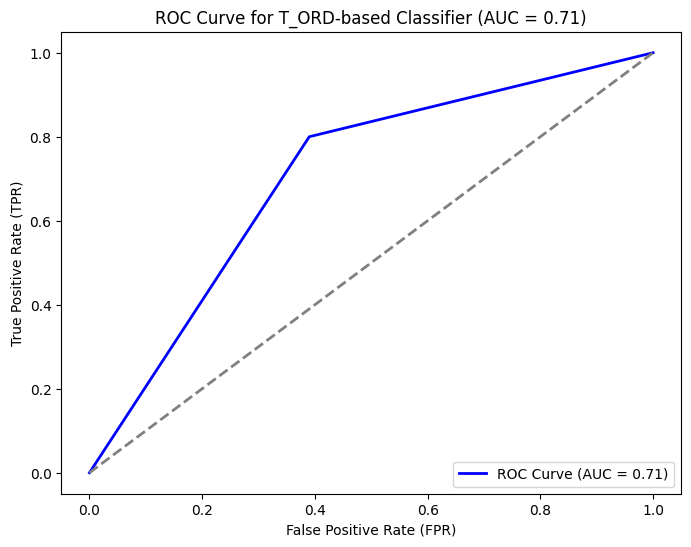

In [ ]:

# Encode the true labels as binary (HEALTHY = 0, SICK = 1)
true_labels = patient_data['Patient_Status'].map({'HEALTHY': 0, 'SICK': 1})

# Encode the predicted labels for the threshold T_ORD == 'Normal' as binary
predicted_scores = patient_data['T_ORD'].apply(lambda x: 0 if x == 'Normal' else 1)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2)  # Diagonal line for random guess
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'ROC Curve for T_ORD-based Classifier (AUC = {roc_auc:.2f})')
plt.legend(loc='lower right')
plt.show()
